In [233]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [234]:
data = pd.read_csv('/content/weatherAUS.csv')
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
86195,2014-09-25,Brisbane,14.8,26.3,0.0,5.0,7.5,NE,39.0,WNW,...,56.0,61.0,1019.1,1011.1,5.0,3.0,22.8,24.6,No,Yes
30465,2008-11-16,Sydney,17.2,22.4,1.2,3.4,4.0,NaN,NaN,S,...,75.0,64.0,1016.4,1016.7,7.0,7.0,19.1,19.4,Yes,No
64366,2009-06-25,MelbourneAirport,4.2,14.3,0.0,2.6,3.8,W,39.0,N,...,86.0,79.0,1013.9,1010.5,7.0,7.0,7.7,10.8,No,Yes
145122,2016-07-23,Uluru,11.6,18.2,0.0,NaN,NaN,ENE,31.0,SSE,...,45.0,35.0,1021.6,1018.5,8.0,8.0,12.3,17.2,No,No
122042,2012-06-04,Perth,15.7,22.9,0.0,4.0,0.9,ENE,35.0,NE,...,47.0,39.0,1018.9,1017.3,7.0,7.0,17.2,22.0,No,No


In [235]:
# Getting rid of the columns with objects which will not be used in our model:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [236]:
# And we need to replace NaN values with mean values of each column:
data.fillna(data.mean(), inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [237]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
92553,14.0,22.1,11.6,5.468232,7.611178,19.0,9.0,9.0,99.0,74.0,1027.8,1024.1,4.447461,4.50993,17.7,21.2,1,0
101424,9.2,18.4,0.0,2.200000,5.300000,30.0,15.0,11.0,93.0,73.0,1016.4,1013.4,6.000000,5.00000,12.7,17.6,0,1
117961,11.6,29.7,0.0,8.000000,12.700000,39.0,7.0,28.0,36.0,39.0,1012.9,1012.6,1.000000,0.00000,23.6,26.6,0,0


In [238]:
y = data.RainTomorrow.values
x_data = data.drop('RainTomorrow', axis=1)
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.468232,7.611178,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.1,0.0,5.468232,7.611178,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.7,0.0,5.468232,7.611178,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.0,0.0,5.468232,7.611178,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.3,1.0,5.468232,7.611178,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0


In [239]:
# In order to scale all the features between 0 and 1:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


In [240]:
# importing sklearn's library for splitting our dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=75)

# For our matrix calculations we need to transpose our matrixis:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (17, 116368)
y_train shape is:  (116368,)
x_test shape is:  (17, 29092)
y_test shape is:  (29092,)


In [241]:
def initialize_weight_bias(dimension):
    w = np.full((dimension,1), 0.01)    # Create a matrix by the size of (dimension,1) and fill it with the values of 0.01
    b = 0.0
    return w,b

In [242]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [243]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation:
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)

    loss = -(1 - y_train) * np.log(1 - y_head) - y_train * np.log(y_head)     # loss function formula
    cost = (np.sum(loss)) / x_train.shape[1]                               # cost function formula

    # backward propagation:
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]

    gradients = {'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias}

    return cost, gradients

In [244]:
def update(w, b, x_train, y_train, learning_rate, nu_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []

    # Initialize for-back propagation for the number of iteration times. Then updating w and b values and writing the cost values to a list:
    for i in range(nu_of_iteration):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        # Update weight and bias values:
        w = w - learning_rate * gradients['derivative_weight']
        b = b - learning_rate * gradients['derivative_bias']
        # Show every 20th value of cost:
        if i % 20 == 0:
            cost_list2.append(cost)
            index.append(i)
            print('Cost after iteration %i: %f' %(i,cost))

    parameters = {'weight': w, 'bias':b}

    # Visulization of cost values:
    plt.plot(index, cost_list2)
    plt.xlabel('Nu of Iteration')
    plt.ylabel('Cost Function Value')
    plt.show()

    return parameters, gradients, cost_list

In [245]:
def prediction(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1

    return y_prediction

In [246]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, nu_of_iteration):
    dimension = x_train.shape[0]
    w, b = initialize_weight_bias(dimension)    # Creating an initial weight matrix of (x_train data[0] x 1)

    # Updating our w and b by using update method.
    # Update method contains our forward and backward propagation.
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, nu_of_iteration)

    # Lets use x_test for predicting y:
    y_test_predictions = prediction(parameters['weight'], parameters['bias'], x_test)

    # Investigate the accuracy:
    print('Test accuracy: {}%'.format(100 - np.mean(np.abs(y_test_predictions - y_test))*100))

Cost after iteration 0: 0.711796
Cost after iteration 20: 0.454102
Cost after iteration 40: 0.427864
Cost after iteration 60: 0.415115
Cost after iteration 80: 0.406957
Cost after iteration 100: 0.401044
Cost after iteration 120: 0.396494
Cost after iteration 140: 0.392870
Cost after iteration 160: 0.389918
Cost after iteration 180: 0.387469
Cost after iteration 200: 0.385411
Cost after iteration 220: 0.383661
Cost after iteration 240: 0.382161
Cost after iteration 260: 0.380865
Cost after iteration 280: 0.379737
Cost after iteration 300: 0.378750
Cost after iteration 320: 0.377883
Cost after iteration 340: 0.377116
Cost after iteration 360: 0.376435
Cost after iteration 380: 0.375828


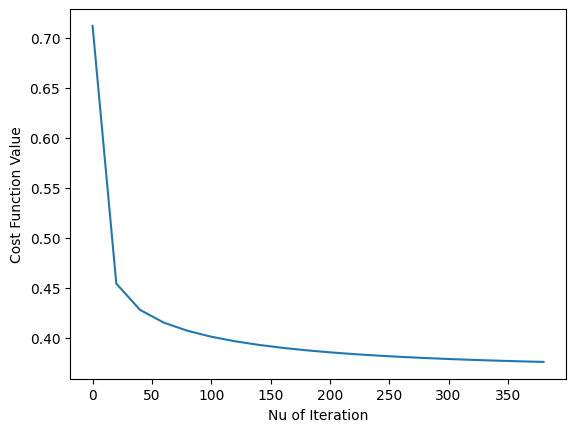

Test accuracy: 83.31843805857281%


In [247]:
lr1=logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, nu_of_iteration=400)

In [248]:
# Importing sklearn library for logistic regression:
from sklearn.linear_model import LogisticRegression

# Creating our model named 'lr'
lr = LogisticRegression()

# Training it by using our train data:
lr.fit(x_train.T, y_train.T)

# Printing our accuracy by using our trained model and test data:
print('Test accuracy of sklearn logistic regression library: {}'.format(lr.score(x_test.T, y_test.T)))

Test accuracy of sklearn logistic regression library: 0.8405059810257115


In [249]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.364001
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.308      
Dependent Variable: y                AIC:              105929.1503
Date:               2023-07-10 07:25 BIC:              106097.2404
No. Observations:   145460           Log-Likelihood:   -52948.    
Df Model:           16               LL-Null:          -76487.    
Df Residuals:       145443           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
MinTemp          1.3075   0.1553   8.4186 0.0000   1.0031   1.6119
MaxTemp         -2.5177   0.2396 -10.5079 0.0000  -2.

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=75)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (116368, 17) (116368,)
Test set: (29092, 17) (29092,)


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [252]:
yhat = lr.predict(x_test)
yhat

yhat_prob = lr.predict_proba(x_test)
yhat_prob

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 2603  3817]
 [  987 21685]]


In [253]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22672
           1       0.73      0.41      0.52      6420

    accuracy                           0.83     29092
   macro avg       0.79      0.68      0.71     29092
weighted avg       0.82      0.83      0.82     29092



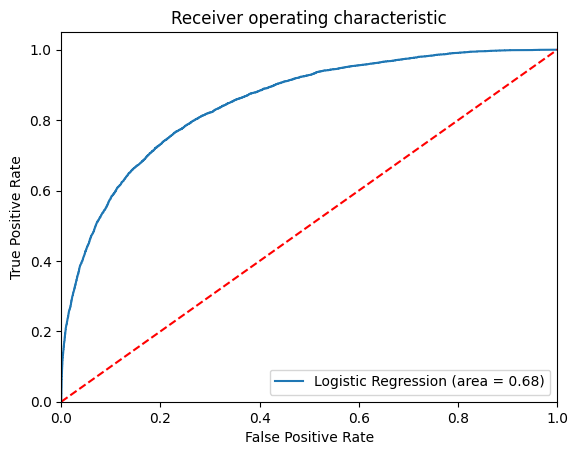

In [254]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#Finally the ROC curve for the regression